# corpus weight
corpus_weight 等于 每个topic中word的数量在整个语料库中word的种类数

#### 导入模型

In [1]:
from corpus import *
from vsm import *
# replace 'topic_range[0]' with a specific number, if you like
k = topic_range[0]
# load the topic model
v = lda_v[k]

Running from notebook, using serial load function.
[100]
/home/inpho/kmx/models/kmx-freq5-freq5-N999999-LDA-K{0}-document-2000.npz
Loading LDA data from /home/inpho/kmx/models/kmx-freq5-freq5-N999999-LDA-K100-document-2000.npz


#### 定义 corpus_weight 函数
topic 为某个主题（从0开始）
在每个topic下，按word的权值由小到大对word进行遍历，如果有threshold个相同的权值，最大权值的word作为截止词

In [10]:
def corpus_weight(topic, threshold = 4):    #需要注意的是：这个函数不适合threshold=1的情况
    topic_list = v.topics()[topic]
    adit_number = 0
    # 按权重由大到小对 word 遍历
    for topic_number in range(len(topic_list)-1,0,-1):
        # 如果word的权重与adit_number不相同，threshold减1
        if topic_list[topic_number][1] != adit_number:
            adit_number = topic_list[topic_number][1]
            threshold -= 1
            if threshold == 0:
                break
    #print topic_number
    return float(topic_number)/len(c.words)

#### 寻找最优threshold值
在threshold取不同值的情况下，计算语料库中权重前十的topic，并与Nicholas权重前十匹配

In [9]:
topic_real = [10, 5, 48, 25, 3, 99, 63, 84, 97, 15, 41, 58]
for threshold in range(2,20):
    topic_dict = {}
    # 计算每个topic的 corpus_weight
    for i in range(0, 100):
        topic_dict[i] = corpus_weight(i,threshold)
    # 按照topic_weight从小到大的顺序排列
    topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)
    topic = []
    weight = []
    counter = 0
    # 遍历 topic_dict_order ，记录权重前十的topic
    for topic_weight in topic_dict_order:
        #print topic_weight
        topic.append(topic_weight[0])
        weight.append(topic_weight[1])
        counter += 1
        if counter == 10:
            break
    count = 0
    # 与权重前十的topic进行对比，count表示匹配数
    for i in topic:
        if i in topic_real:
            count += 1
    print threshold,count,topic
    print weight

2 2 [46, 58, 34, 65, 80, 63, 21, 75, 79, 7]
[0.9997191405701447, 0.9997191405701447, 0.785423395590507, 0.758320460609465, 0.7126808032579693, 0.7116977952534757, 0.7073444740907175, 0.7062210363712962, 0.6965313860412863, 0.6952675186069373]
3 1 [34, 65, 63, 92, 79, 21, 85, 7, 46, 82]
[0.7528437017272855, 0.7121190843982587, 0.6713944670692319, 0.6462575480971774, 0.6444319618031176, 0.6442915320881899, 0.6413425080747086, 0.6364274680522398, 0.6347423114731077, 0.6265973880073024]
4 2 [58, 46, 34, 65, 75, 80, 21, 4, 48, 76]
[0.5517483499508496, 0.4976829097036933, 0.3217244768993119, 0.28521275101811544, 0.24224125825024576, 0.23578149136357254, 0.2346580536441511, 0.2234236764499368, 0.22300238730515376, 0.2201937930066002]
5 2 [34, 65, 21, 48, 46, 4, 13, 75, 80, 58]
[0.23311332677994664, 0.19983148434208678, 0.1800308945372841, 0.17497542479988765, 0.16626878247437157, 0.16514534475495016, 0.16121331273697515, 0.1575621401488555, 0.1529279595562421, 0.1495576463979778]
6 1 [34, 65,

### 以表的形式显示 corpus weight 前十的 topic

In [11]:
topic_dict = {}
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_dict[i] = corpus_weight(i)
# 按照topic_weight从小到大的顺序排列
topic_dict_order = sorted(topic_dict.items(), key = lambda item : item[1], reverse = True)

topic = []  # 记录前10的topic
weight = []  #前十topic对应的权重
words = []  #前十topic的keywords
count = 0
# 取权重前十的topic及其权重。topic编号记录在topic[]中，对应的权重记录在weight[]中，每个topic下的word记录在word[]中
for topic_weight in topic_dict_order:
    topic.append(topic_weight[0])
    weight.append(topic_weight[1])
    word_weight_list = v.topics()[topic_weight[0]]
    word = []
    for word_weight in word_weight_list:
        word.append(word_weight[0])
    words.append(word)
    count += 1
    if count == 10:
        break
# 画表
from pandas import Series,DataFrame
import pandas as pd
data = {"topic":topic,"corpus_weight":weight,"keywords":words}
DataFrame(data,columns=['topic','corpus_weight','keywords'])

,topic,corpus_weight,keywords
0,58,0.551748,"[乐, 礼, 声, 音, 鼓, 和, 钟, 歌, 奏, 舞, 象, 心, 琴, 先, 时, ..."
1,46,0.497683,"[州, 卓, 绍, 操, 天, 等, 曹, 张, 刘, 袁, 布, 董, 东, 杀, 史, ..."
2,34,0.321724,"[能, 天, 足, 一, 死, 莫, 游, 生, 乐, 世, 鱼, 千, 方, 马, 穷, ..."
3,65,0.285213,"[世, 德, 君, 义, 心, 宜, 后, 忠, 明, 可, 重, 昔, 绝, 功, 臣, ..."
4,75,0.242241,"[太, 守, 郡, 人, 时, 举, 拜, 字, 迁, 征, 家, 名, 书, 后, 司, ..."
5,80,0.235781,"[年, 帝, 事, 初, 平, 阳, 永, 十, 人, 元, 国, 二, 及, 书, 武, ..."
6,21,0.234658,"[余, 离, 将, 流, 灵, 风, 长, 可, 怀, 屈, 原, 独, 游, 上, 远, ..."
7,4,0.223424,"[明, 国, 福, 山, 祸, 日, 室, 门, 心, 安, 王, 伤, 复, 道, 成, ..."
8,48,0.223002,"[君子, 尔, 维, 心, 人, 思, 止, 载, 匪, 风, 实, 归, 女, 莫, 采,..."
9,76,0.220194,"[光, 侯, 事, 军, 国, 将, 上, 司, 史, 书, 奏, 宣, 武, 马, 丞相,..."


### 以图的形式表示每个topic的corpus weight

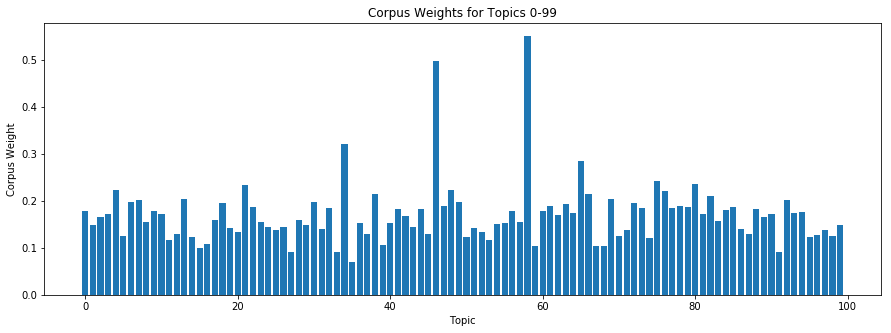

In [12]:
import matplotlib.pyplot as plt
topic_weight_list = []
X = []
# 计算每个topic的 corpus_weight
for i in range(0, 100):
    topic_weight_list.append(corpus_weight(i))
    X.append(i)
plt.figure(figsize=(15,5))
plt.bar(X, topic_weight_list)
    
plt.xlabel('Topic')  
plt.ylabel('Corpus Weight')  
plt.title('Corpus Weights for Topics 0-99')  
plt.savefig('figure corpus Weight')
plt.show()